In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import roc_curve, f1_score, balanced_accuracy_score, accuracy_score
from  sklearn.metrics import confusion_matrix as cm
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline

In [2]:
def return_no_words(x):
    x = nltk.tokenize.word_tokenize(x)
    return len(x)

In [3]:
def report_results(results_path):
    results = pd.read_csv(results_path)
    # 1 prediction distribution of aggression
    # 0 negative prediction distribution of aggression
    plt.hist([results["y_predict_prob_1"],results["y_predict_prob_0"]])
    plt.ylim(0, 25000)

    # predict.prob scores
    fpr, tpr, thrshold = roc_curve(results["y_true_bool"], results["y_predict_prob_1"])
    roc_auc = auc(results["y_true_bool"], results["y_predict_prob_1"])
    print("AUC score", roc_auc)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    # predict scores
    fpr, tpr, thrshold = roc_curve(results["y_true_binary"], results["y_prediction"])
    roc_auc = auc(results["y_true_binary"], results["y_prediction"])
    print("AUC score", roc_auc)
    # Confusion Matrix
    tn, fp, fn, tp = cm(y_true=results["y_true_binary"], y_pred=results["y_prediction"]).ravel()
    print("CM", tn, fp, fn, tp)
    F1_score = f1_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("F1-score", F1_score)
    #imbalanced accuracy score - NOT TO Trust
    imbalanced_accuracy_score = accuracy_score(y_true=results["y_true_binary"], y_pred=results["y_prediction"])
    print("imbalanced_accuracy_score", imbalanced_accuracy_score)

In [4]:
def dataset_features_analysis(data, no_features_to_return=10):
    from sklearn.feature_extraction.text import CountVectorizer
    from sklearn.feature_extraction.text import TfidfTransformer
    from sklearn.pipeline import Pipeline
    pipe = Pipeline([('count',  CountVectorizer(ngram_range=(1,2), analyzer='word', max_features=10000)),
                         ('tfid',TfidfTransformer(norm='l2', sublinear_tf=True))]).fit(data)
    data_features = pipe.transform(data)
    print("Features mean", data_features.mean())
    sum_words = data_features.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in pipe['count'].vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    print("Most occuring features", words_freq[:no_features_to_return])
    return words_freq

# Attack data analysis

In [18]:
attack_data = pd.read_csv("../attack_parsed_dataset.csv")

In [19]:
attack_data['Text'] = attack_data['Text'].apply(lambda x: str(x).replace("NEWLINE_TOKEN", " "))
attack_data['Text'] = attack_data['Text'].apply(lambda x: str(x).replace("TAB_TOKEN", " "))

In [20]:
len(attack_data)

115864

In [22]:
len(attack_data[attack_data["oh_label"] == 1])

13590

In [23]:
len(attack_data[attack_data["oh_label"] == 0])

102274

In [7]:
#avergae number of words per post
attack_data["No words"] = attack_data["Text"].apply(lambda x : return_no_words(x))

In [8]:
print("mean",np.mean(attack_data["No words"]))
print("STD", np.std(attack_data["No words"]))

mean 83.82638265552717
STD 160.59309688350825


(0, 3000)

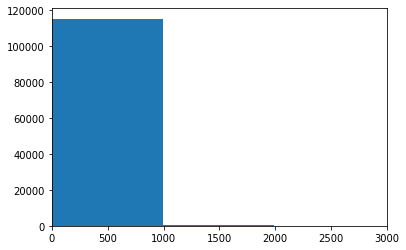

In [9]:
plt.hist(attack_data["No words"])
plt.xlim(0,3000)

# Features analysis (Word)

In [10]:
df_wikipeida = dataset_features_analysis(attack_data['Text'], 1000)

Features mean 0.000616881779144898
Most occuring features [('the', 5239.024202319904), ('you', 4200.331387214992), ('to', 4179.713003159275), ('and', 3648.5675534663656), ('of', 3565.743217442986), ('is', 3510.2375721970066), ('it', 3232.1776910485837), ('that', 3068.4286056410647), ('in', 2853.7646767573874), ('this', 2541.1989115234205), ('for', 2476.381290685266), ('not', 2430.8070449233733), ('on', 2258.33603844258), ('be', 2182.2296305024042), ('are', 2152.9679646715886), ('have', 2033.8266738565094), ('as', 1982.521750500558), ('your', 1966.403330571776), ('with', 1784.4645328830784), ('was', 1753.919442315531), ('my', 1747.8136412968895), ('article', 1717.1643122117212), ('if', 1630.9970497643142), ('but', 1597.2060899573826), ('me', 1571.9581618175293), ('page', 1559.9493851774967), ('do', 1525.3329248743548), ('or', 1523.05486992245), ('what', 1476.3333288800886), ('wikipedia', 1453.6489534672485), ('an', 1453.2050713417932), ('of the', 1422.891523647065), ('can', 1420.9196122

In [11]:
words = []
numbers = []
for i in df_wikipeida:
    words.append(i[0])
    numbers.append(i[1])
pd.DataFrame({"Wikipedia_features": words, "wikipedia_featurs_No": numbers}).to_csv("Wikipedia_features.csv")

# Attack dataset - linear - word - oh label

AUC score 0.947995724544426


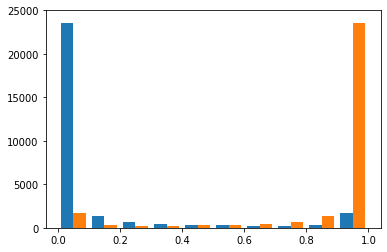

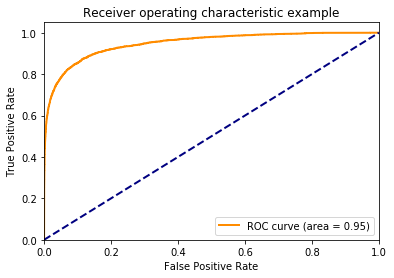

AUC score 0.824538086675527
CM 25132 450 1128 2256
F1-score 0.7408866995073891
imbalanced_accuracy_score 0.9455223365324864


In [10]:
report_results("linear_word_oh_attack_prediction_results.csv")

# Attack linear char oh

AUC score 0.9218981661739087


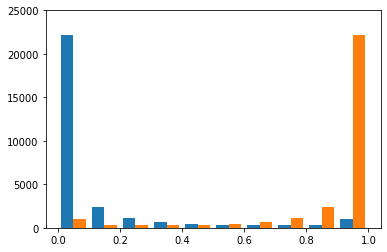

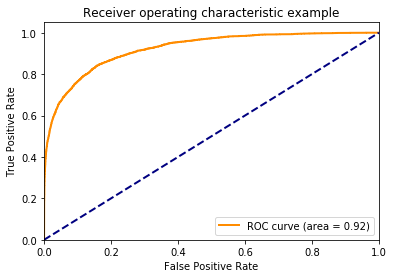

AUC score 0.7584233472626926
CM 25140 458 1567 1801
F1-score 0.6401279545050649
imbalanced_accuracy_score 0.9300904508734378


In [11]:
report_results("linear_char_oh_attack_prediction_results.csv")

# Attack mlp word oh

AUC score 0.9457019032321747


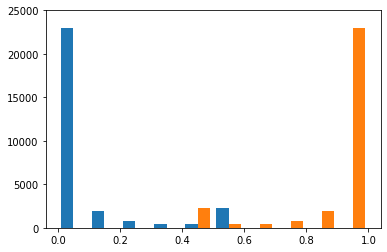

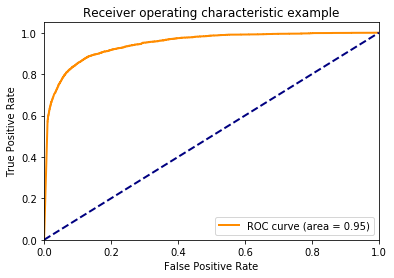

AUC score 0.7880949868462314
CM 25269 296 1402 1999
F1-score 0.7018960674157304
imbalanced_accuracy_score 0.9413795484360975


In [12]:
report_results("mlp_word_oh_attack_prediction_results.csv")

# Attack mlp char oh

AUC score 0.9463109752590044


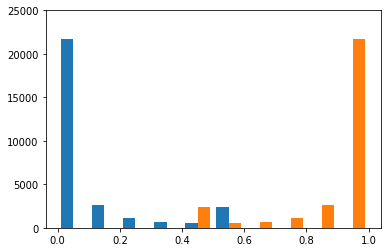

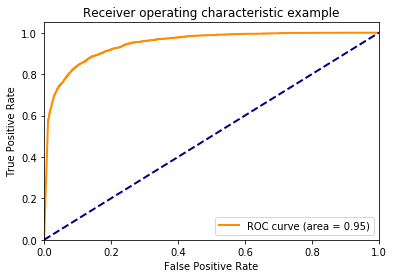

AUC score 0.7905502645587754
CM 25243 374 1354 1995
F1-score 0.6977964323189926
imbalanced_accuracy_score 0.9403438514120003


In [13]:
report_results("mlp_char_oh_attack_prediction_results.csv")

# lstm attack word

AUC score 0.9555992812282208


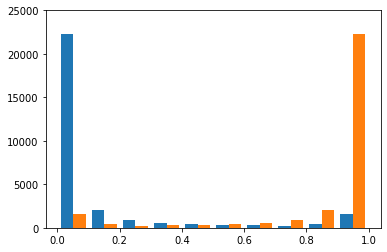

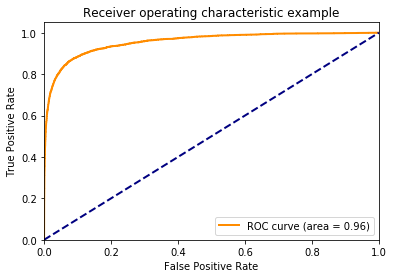

AUC score 0.8437214286488619
CM 25147 466 987 2366
F1-score 0.7650767987065482
imbalanced_accuracy_score 0.9498377407995581


In [14]:
report_results("lstm_word_oh_attack_prediction_results.csv")

# lstm attack char

AUC score 0.7997132253938664


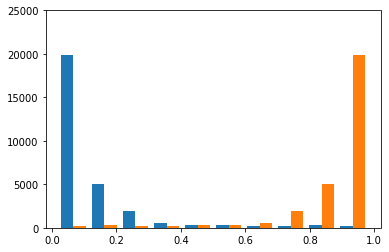

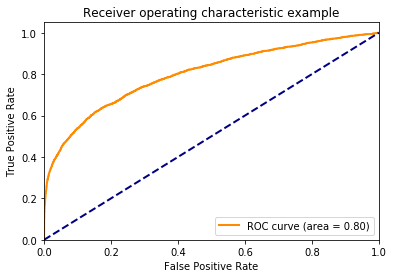

AUC score 0.642438037538878
CM 25291 282 2389 1004
F1-score 0.4291515281042958
imbalanced_accuracy_score 0.9077884416212111


In [15]:
report_results("lstm_char_oh_attack_prediction_results.csv")

# conv-lstm attck word

AUC score 0.9276676458003958


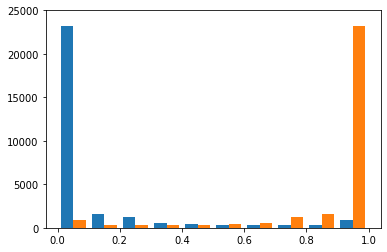

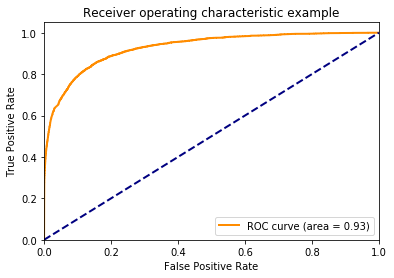

AUC score 0.7448299819084825
CM 25170 311 1736 1749
F1-score 0.6308385933273218
imbalanced_accuracy_score 0.9293309397224332


In [16]:
report_results("conv_lstm_word_oh_attack_prediction_results.csv")

# conv-lstm attack char

AUC score 0.9332840227255018


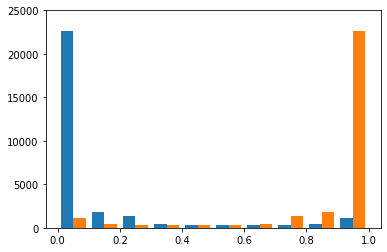

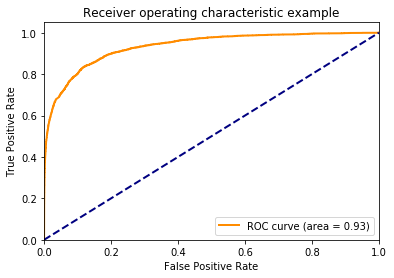

AUC score 0.7810257645416999
CM 25252 414 1392 1908
F1-score 0.6787620064034151
imbalanced_accuracy_score 0.9376510391493476


In [17]:
report_results("conv_lstm_char_oh_attack_prediction_results.csv")